# Logistic regression 

 # # categorical  value # classification problem 
- binary classification 
- multiclass 
- we have to find out maximum fitted line two separate data in binary class 

In [83]:
                                                                                                    import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
                                                                                                                                    df=pd.read_csv('diabetes1.csv')

In [ ]:
df

In [ ]:
df.head()

# basic checks 

# understanding the dataset i.e domain analysis 

In [ ]:
df.describe()

- in above data min value is zero but it is not posssible 
- need to change those values  in some columns 

In [ ]:
df.info()

# Exploratory data analysis - plotting insights 

In [ ]:
# step1 - univarainate - simple feature with target and single feature

In [ ]:
sns.countplot(x='Pregnancies',data=df)
plt.show()

In [ ]:
df.Pregnancies.value_counts() # counting pregantant

 #### for loop to plot all columns - create canvas using matplot lib

In [ ]:
df.columns # get all columns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.figure(figsize=(20,25))
plotnumber=1
for columns in df.columns:
    plt.subplot(3,3,plotnumber)
    sns.histplot(df[columns],kde=True)
    plt.xlabel(columns)
    plt.ylabel('Count')
    plotnumber=plotnumber+1
plt.tight_layout() # not overplapping subplots 

In [ ]:
# step2 : bivariate analysis 
sns.countplot(x='Pregnancies',data=df,hue='Outcome')

- pregancies inceases diabeties increase after 7 time pregant diabeties is more 

In [ ]:
sns.countplot(x='Glucose',data=df,hue='Outcome')

In [ ]:
sns.histplot(x='Glucose',data=df,hue='Outcome') # bcoz cont typew variables 

- insight - glucose level till 50 to 75 very less cahnces of diabeties 
- 75 to 150 minium chances 
- after 150to 175 more glucose diabetics more 

In [ ]:
sns.relplot(x='Glucose',y='BloodPressure', data=df,hue='Outcome')

- we cant decide anything just basis of glucose and bp

In [ ]:
sns.relplot(x='Age',y='BloodPressure', data=df,hue='Outcome')

- as age increases the bp increase 

In [ ]:
sns.histplot(x='BloodPressure',data=df,hue='Outcome') # counts range 

In [ ]:
df.columns

In [ ]:
 sns.histplot(x='SkinThickness',data=df,hue='Outcome') 

In [ ]:
 sns.histplot(x='Age',data=df,hue='Outcome') 

- insight: as prbablity age inceses diabiteis count incresaes

In [ ]:
 sns.histplot(x='Insulin',data=df,hue='Outcome') 

In [ ]:
sns.histplot(x='BMI',data=df,hue='Outcome') 

# logistic regression 
- muliple classification 

In [ ]:
sns.relplot(x='Age',y='Outcome' ,data=df) 

In [ ]:
sns.histplot(x='Age',hue='Outcome' ,data=df) 
plt.show()

- as age increases probalbility of getting diabetties increase 

# data preprocessing and feature engineering 

In [ ]:
# step1 : handilng null values
df.isnull().sum()

In [ ]:
# step2: handling the corrupted data
# glucose, bloodpresuure ,skin thikness ,insunin value can not be zero 
# but we have to change them

In [ ]:
df.loc[df['Glucose']==0]

In [ ]:
# change using calculate median because it can not change too much insted of mean 

In [ ]:
df['Glucose'].replace(0,np.median(df['Glucose']),inplace=True)

In [ ]:
df.loc[df['Glucose']==0] # no value zeoes present

In [ ]:
# changing the value zero into median of bp,skin thickness, insulin ,bmi

In [ ]:
col=['BloodPressure','SkinThickness','Insulin','BMI']

In [ ]:
for i in col:
    df[i].replace(0,np.median(df[i]),inplace=True)

In [ ]:
df.describe()

In [ ]:
# step3: -converting categorical into numerical 
# but we skip bcoz all data in numericals

In [13]:
import warnings
warnings.filterwarnings('ignore')

C:\Users\Vijay Shelke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vijay Shelke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vijay Shelke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\V

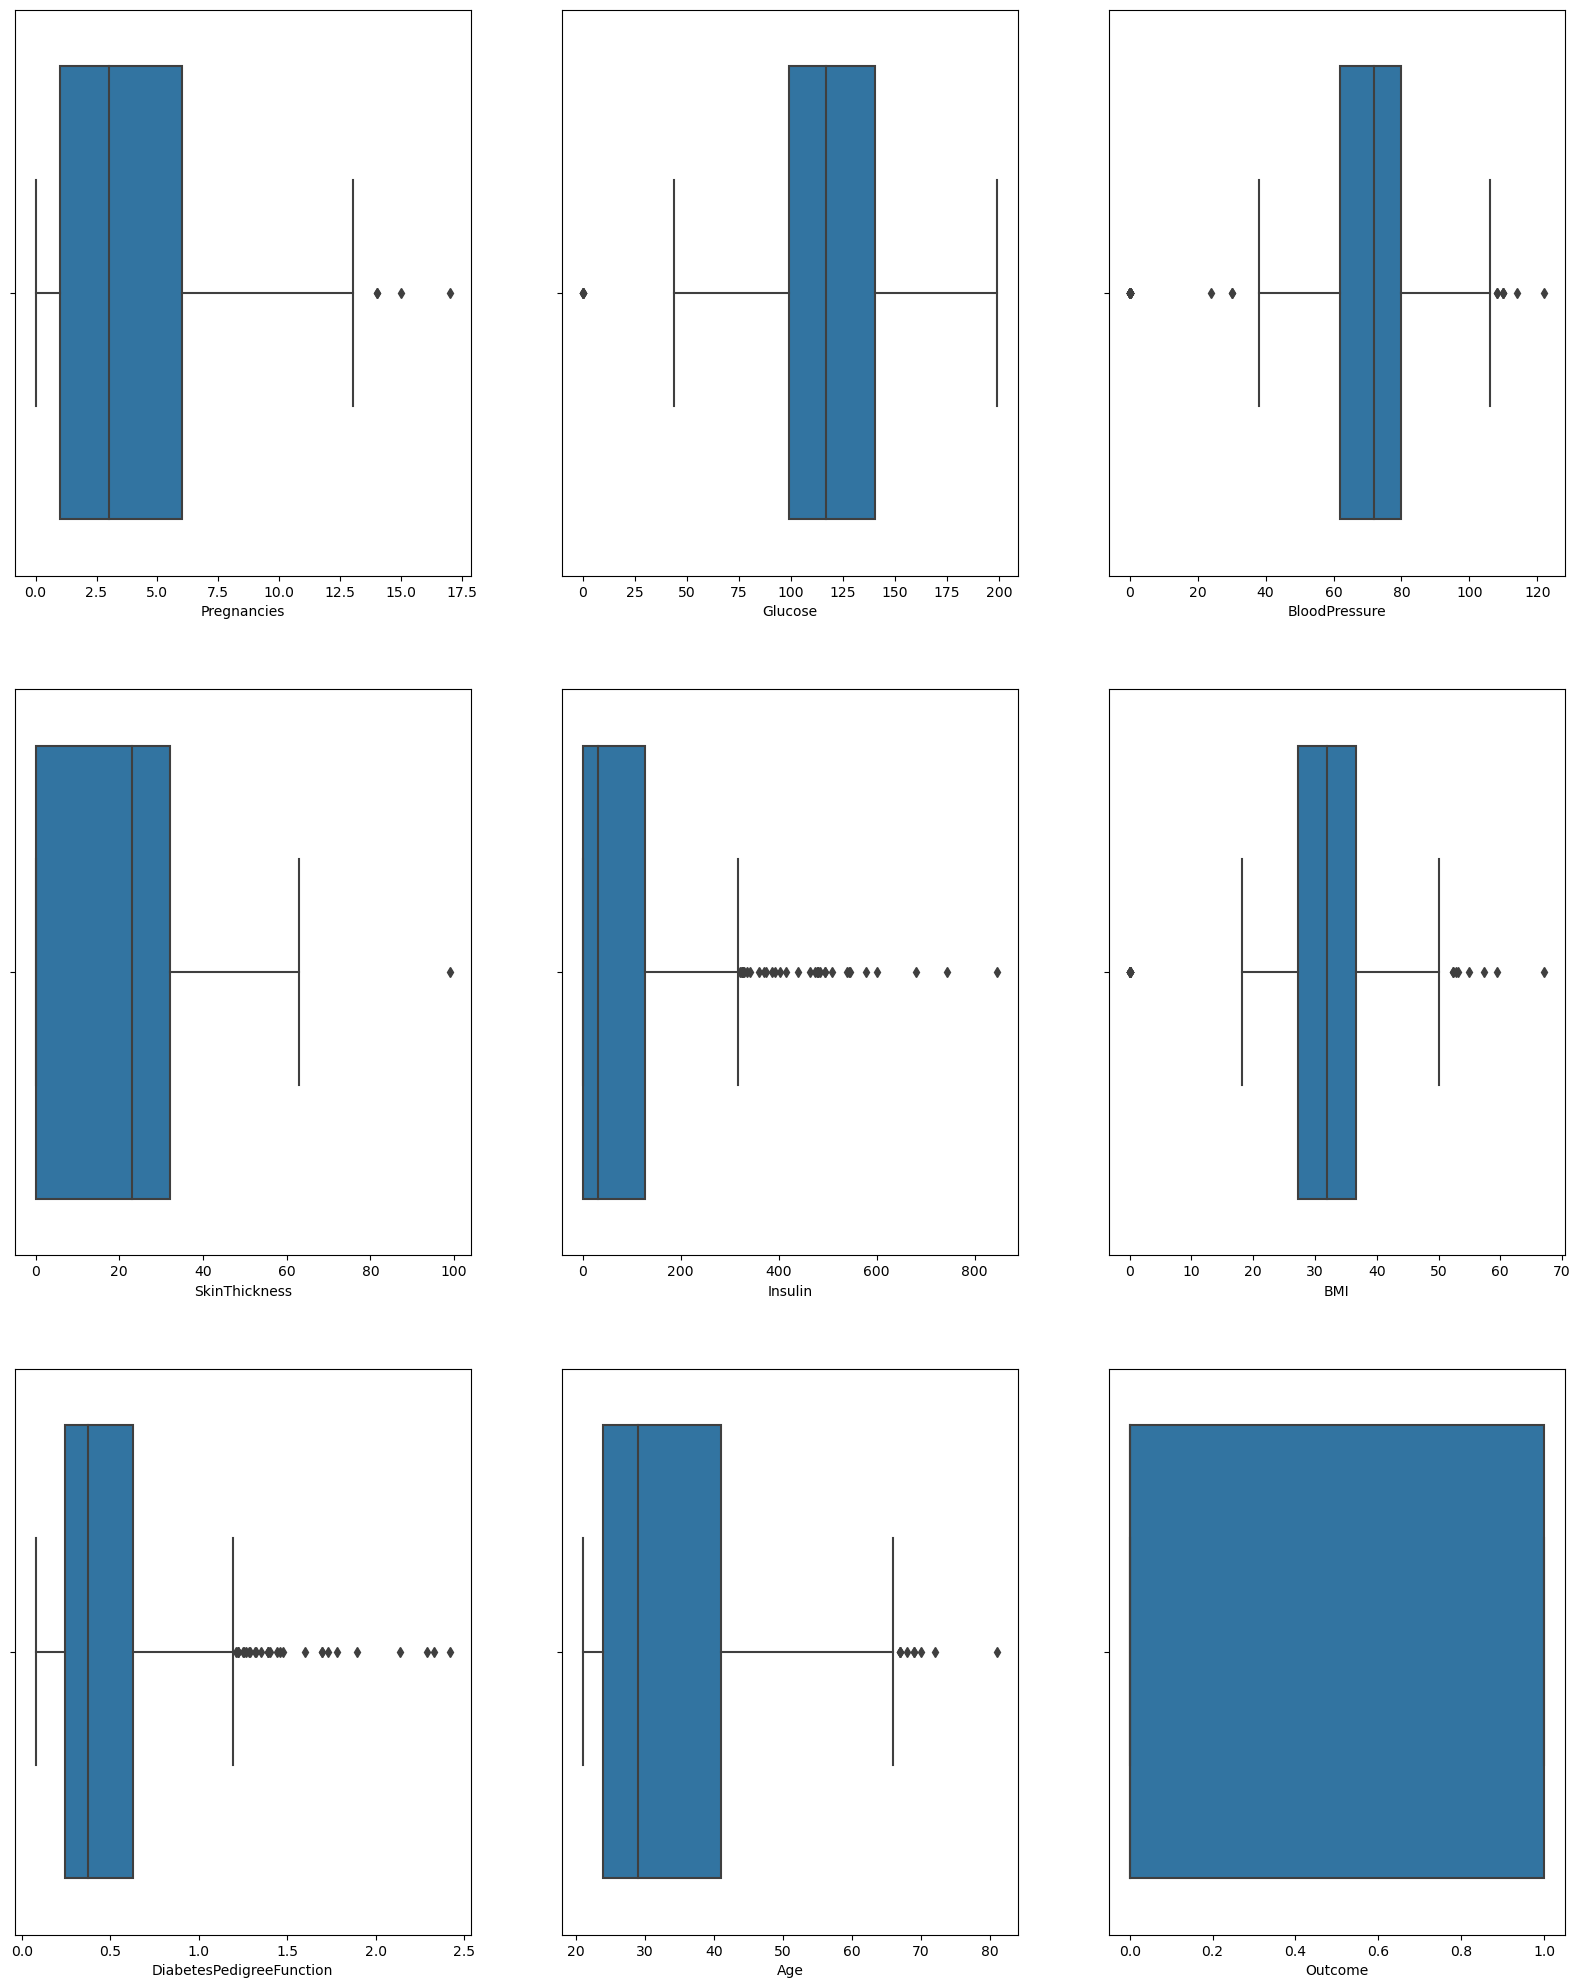

<Figure size 640x480 with 0 Axes>

In [9]:
# step4: checking for outliers 
plt.figure(figsize=(20,25))
plotnumber=1
for col in df.columns:
    plt.subplot(3,3,plotnumber) # divide your columns into 3*3 
    sns.boxplot(df[col])
    plotnumber=plotnumber+1
plt.show()
plt.tight_layout() # avoid overlapping of graphs

# so remove outliers : 
-  using scaling - take range 
- 1. std scaler - median=0 and std.deviation =1
- 2. min max scaler 
- using sigmoid function ,probablity decides posotive and negative class

In [14]:
#step 5: scaling
    
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler=MinMaxScaler()

In [35]:
df1= scaler.fit_transform(df.drop('Outcome',axis=1))

In [36]:
df1

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [ ]:
len(df1)

In [ ]:
len(df)

In [37]:
df2=pd.DataFrame(df1)

In [38]:
df2

,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [ ]:
# rename the columns 

In [39]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [29]:
df2.columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction','Age']

ValueError: Length mismatch: Expected axis has 9 elements, new values have 8 elements

In [40]:
df2

,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [ ]:
# Feature Engineering: selecting the right columns and dropping some columns if not important 

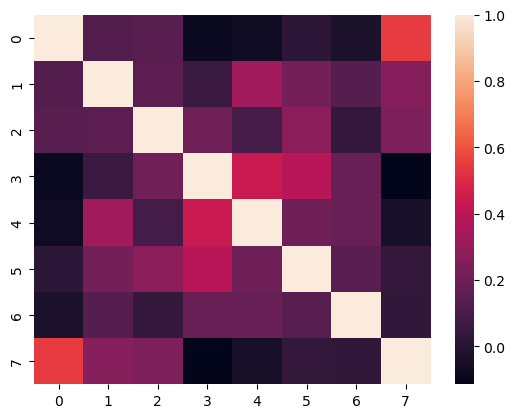

In [41]:
sns.heatmap(df2.corr())
plt.show()

In [ ]:
df2.corr()

In [ ]:
# heatmap uses - 

In [42]:
df2

,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [44]:
df2['Outcome']=df['Outcome']

In [45]:
df2

,0,1,2,3,4,5,6,7,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [23]:
# train and test data split it


In [24]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(df2.drop('Outcome',axis=1),df2['Outcome'],random_state=42)

In [52]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
554    0
319    1
594    0
6      1
615    0
Name: Outcome, Length: 192, dtype: int64

In [54]:
from sklearn.linear_model import LogisticRegression

In [56]:
clf=LogisticRegression()

In [57]:
clf.fit(x_train,y_train)

LogisticRegression()

In [58]:
y_pred=clf.predict(x_test) # prediction done by probability of sigmoid 

In [59]:
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [60]:
clf.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [62]:
clf.predict_proba(x_test) # prbabilities of sigmoid 

array([[0.67067232, 0.32932768],
       [0.79015922, 0.20984078],
       [0.84891413, 0.15108587],
       [0.75475664, 0.24524336],
       [0.52341214, 0.47658786],
       [0.54204986, 0.45795014],
       [0.94792666, 0.05207334],
       [0.57180417, 0.42819583],
       [0.48873648, 0.51126352],
       [0.32991767, 0.67008233],
       [0.67946335, 0.32053665],
       [0.189648  , 0.810352  ],
       [0.59909049, 0.40090951],
       [0.67039791, 0.32960209],
       [0.87093662, 0.12906338],
       [0.64150446, 0.35849554],
       [0.82784482, 0.17215518],
       [0.86258485, 0.13741515],
       [0.34313288, 0.65686712],
       [0.56951575, 0.43048425],
       [0.73105043, 0.26894957],
       [0.85967937, 0.14032063],
       [0.50296727, 0.49703273],
       [0.85757776, 0.14242224],
       [0.48811839, 0.51188161],
       [0.23221889, 0.76778111],
       [0.81025863, 0.18974137],
       [0.90858621, 0.09141379],
       [0.745204  , 0.254796  ],
       [0.81124713, 0.18875287],
       [0.

In [63]:
# model evaluation : do classification 


In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [76]:
confusion_matrix(y_test,y_pred) # actual valur ,predicted value 

array([[104,  19],
       [ 30,  39]], dtype=int64)

In [71]:
recall_score(y_test,y_pred)

0.5652173913043478

In [73]:
# check precision
precision_score(y_test,y_pred)

0.6724137931034483

In [77]:
f1_score(y_test,y_pred)

0.6141732283464567

In [78]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       123
           1       0.67      0.57      0.61        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



In [80]:
# support : data points 
y_test.value_counts()

0    123
1     69
Name: Outcome, dtype: int64

#2.  multiple classes type 